In [18]:
library(ggpubr)
source('../scripts/myutils.R')
source('../scripts/mytheme.R')
library(tidyverse)
library(data.table)

In [21]:
df <- fread('250327_lapa_full_pls_support.tsv')

metadata <- fread("../data/pantranscriptome_samples_metadata.tsv")
metadata <- metadata[merged_run_mode==TRUE]
metadata <- metadata[mixed_samples==FALSE]
popcols <- unique(metadata$color_pop)
names(popcols) <- unique(metadata$population)

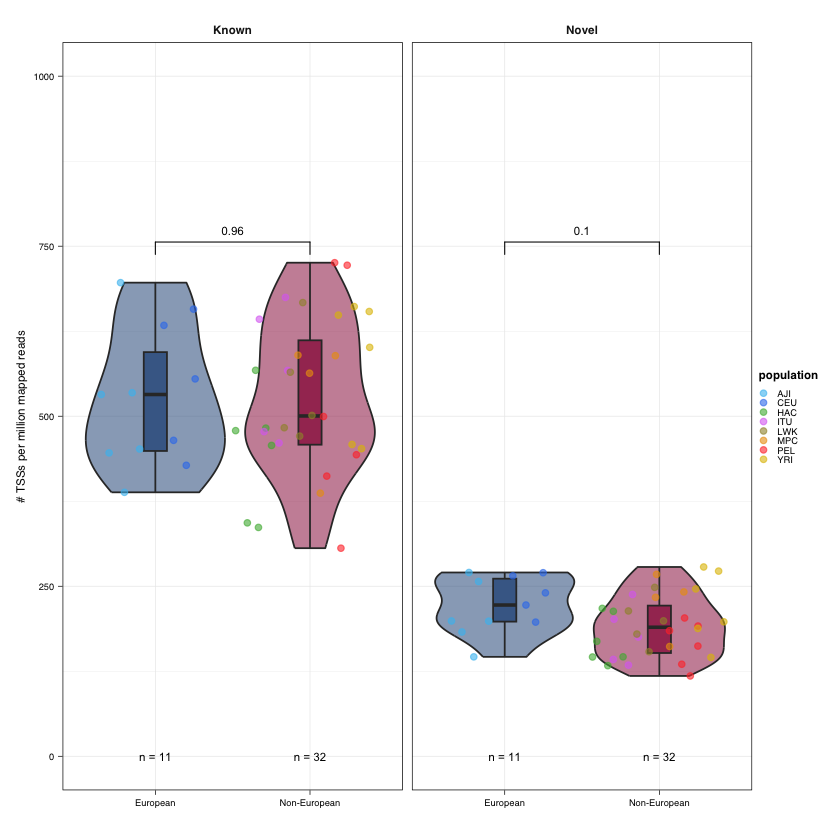

In [24]:
p <- ggplot(df, 
       aes(x = eur, y = norm_n_tss, fill = eur)) +
  geom_violin(position = position_dodge(0.9), alpha = 0.6) + 
  geom_boxplot(outliers = FALSE, width = 0.15, position = position_dodge(0.9)) +
  ggbeeswarm::geom_quasirandom(alpha = 0.6, width = 0.2, dodge.width = 0.8, aes(col=population)) +
  mytheme +
  scale_fill_manual(values = c("#466995", "#A53860")) +
  stat_summary(fun.data = n_fun, geom = "text", fun.args = list(y = 0), 
               position = position_dodge(0.9), size=7*0.35) +
  labs(x = "", y = "# TSSs per million mapped reads", col="population")+
  facet_wrap(~novelty, nrow=1)+
  guides(fill="none")+
  scale_color_manual(values=popcols)+
  theme(legend.key.size = unit(0.2, "cm"))+
  geom_pwc(ref.group="European",
           method="t_test", label.size=7*0.35
  )+ylim(c(0,1000))
ggadjust_pvalue(
  p=p,
  p.adjust.method = "BH",
  label = "p.adj.format",
  hide.ns = NULL,
  output = c("plot"))

In [27]:
max_row <- df[which.max(norm_n_tss)]
print(max_row)

      V1 int_pls sample    ooa          eur population map_reads_assemblymap
   <int>  <lgcl> <char> <char>       <char>     <char>                 <num>
1:    79    TRUE   PEL6    OOA Non-European        PEL               8657393
   n_tss norm_n_tss novelty
   <int>      <num>  <char>
1:  6283   725.7381   Known


In [28]:
max_row <- df[which.min(norm_n_tss)]
print(max_row)

      V1 int_pls sample    ooa          eur population map_reads_assemblymap
   <int>  <lgcl> <char> <char>       <char>     <char>                 <num>
1:    35   FALSE   PEL5    OOA Non-European        PEL              24396936
   n_tss norm_n_tss novelty
   <int>      <num>  <char>
1:  2882   118.1296   Novel


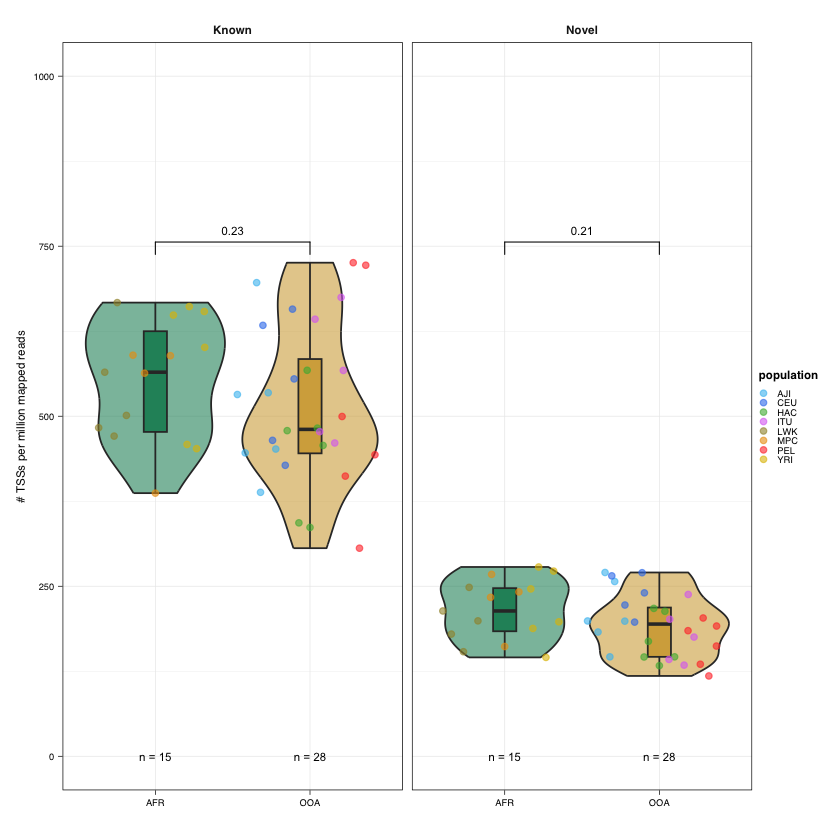

In [30]:
# also compare ooa and afr
p <- ggplot(df, 
       aes(x = ooa, y = norm_n_tss, fill = ooa)) +
  geom_violin(position = position_dodge(0.9), alpha = 0.6) + 
  geom_boxplot(outliers = FALSE, width = 0.15, position = position_dodge(0.9)) +
  ggbeeswarm::geom_quasirandom(alpha = 0.6, width = 0.2, dodge.width = 0.8, aes(col=population)) +
  mytheme +
  scale_fill_manual(values = c("#259069", "#D5AC4B")) +
  stat_summary(fun.data = n_fun, geom = "text", fun.args = list(y = 0), 
               position = position_dodge(0.9), size=7*0.35) +
  labs(x = "", y = "# TSSs per million mapped reads", col="population")+
  facet_wrap(~novelty, nrow=1)+
  guides(fill="none")+
  scale_color_manual(values=popcols)+
  theme(legend.key.size = unit(0.2, "cm"))+
  geom_pwc(ref.group="OOA",
           method="t_test", label.size=7*0.35
  )+ylim(c(0,1000))
ggadjust_pvalue(
  p=p,
  p.adjust.method = "BH",
  label = "p.adj.format",
  hide.ns = NULL,
  output = c("plot"))